In [2]:
import matplotlib.pyplot as plt


class Bayes(object):
    '''
    INPUT:
        prior (dict): key is the value (e.g. 4-sided die),
                      value is the probability
        likelihood_func (function): takes a new piece of data and the value and
                                    outputs the likelihood of getting that data
    '''
    def __init__(self, prior, likelihood_func):
        self.prior = prior
        self.likelihood_func = likelihood_func


    def normalize(self):
        '''
        INPUT: None
        OUTPUT: None
        Makes the sum of the probabilities equal 1.
        '''
        total = float(sum(self.prior.values()))
        for key in self.prior:
            self.prior[key] /= total

    def update(self, data):
        '''
        INPUT:
            data (int or str): A single observation (data point)
        OUTPUT: None
        
        Conduct a bayesian update. Multiply the prior by the likelihood and
        make this the new prior.
        '''
        for key in self.prior:
            self.prior[key] *= self.likelihood_func(data, key)
        self.normalize()

    def print_distribution(self):
        '''
        Print the current posterior probability.
        '''
        sorted_keys = sorted(self.prior.keys())
        for key in sorted_keys:
            print "%s:%s" % (str(key), str(self.prior[key]))

    def plot(self, color=None, title=None, label=None):
        '''
        Plot the current prior.
        '''
        sorted_keys = sorted(self.prior.keys())
        sorted_probs = [self.prior[key] for key in sorted_keys]
        plt.plot(sorted_keys, sorted_probs, color=color, label=label)
        plt.title(title)


In [4]:
# from bayes import Bayes         # for Bayes
import numpy as np              # for linspace
import scipy.stats as stats     # for binom, uniform
import matplotlib.pyplot as plt # for plot

%matplotlib inline

In [5]:
ctr_omega = np.linspace(0, 1, 101)

In [6]:
ctr_priors = { k:stats.uniform.pdf(k, loc=0, scale=1) for k in ctr_omega }

In [7]:
def ctr_likelihood(data, x):
    # what is the likelihood of drawing data
    # given that CTR is x
    # data = 0 for non-click, 1 for click
    # we have one observation only
    return(stats.binom.pmf(data, 1, x))

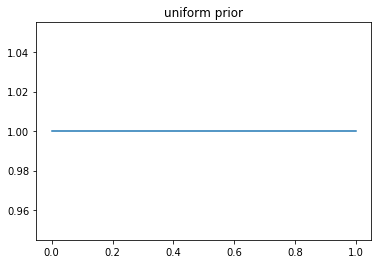

In [8]:
bayes = Bayes(ctr_priors.copy(), ctr_likelihood)
bayes.plot(title="uniform prior")

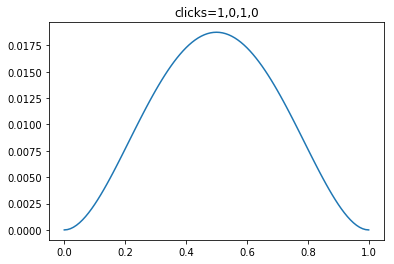

In [9]:
bayes.update(1) # click
bayes.update(0) # no click
bayes.update(1) # click
bayes.update(0) # no click

bayes.plot(title="clicks=1,0,1,0")

In [10]:
def feed_bayes_and_plot(bayes, data_sequence):
    N = len(data_sequence)
    
    fig, axs = plt.subplots(1, N, figsize=(16, 3))
    
    # for each new data point
    for i, ax in enumerate(axs.flatten()):
        bayes.update(data_sequence[i])
        sorted_keys = sorted(bayes.prior.keys())
        sorted_probs = [bayes.prior[key] for key in sorted_keys]
        ax.plot(sorted_keys, sorted_probs)
        ax.set_title(",".join(map(str,data_sequence[0:i+1])))
        ax.get_yaxis().set_ticks([])
        if i==0:
            ax.set_ylabel('pdf')
        ax.set_xlabel('p')


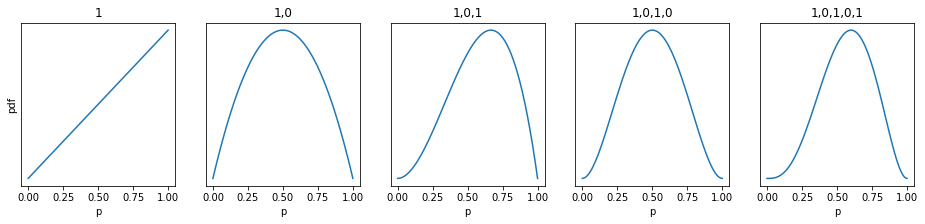

In [11]:
clicks_siteA = [1,0,1,0,1]

bayesA = Bayes(ctr_priors.copy(), ctr_likelihood)
feed_bayes_and_plot(bayesA, clicks_siteA)

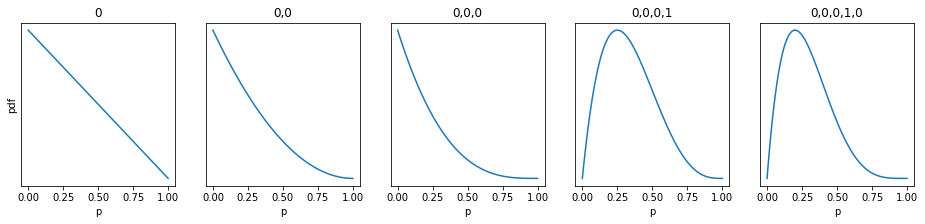

In [12]:
clicks_siteB = [0,0,0,1,0]

bayesB = Bayes(ctr_priors.copy(), ctr_likelihood)
feed_bayes_and_plot(bayesB, clicks_siteB)

In [13]:
ctr_omega = np.linspace(0, 1, 101)
ctr_priors = { k:stats.beta.pdf(k, a=1, b=1) for k in ctr_omega }

In [14]:
def ctr_likelihood(data, x):
    # what is the likelihood of drawing data
    # given that CTR is x
    # data = 0 for non-click, 1 for click
    return(stats.binom.pmf(data, 1, x))


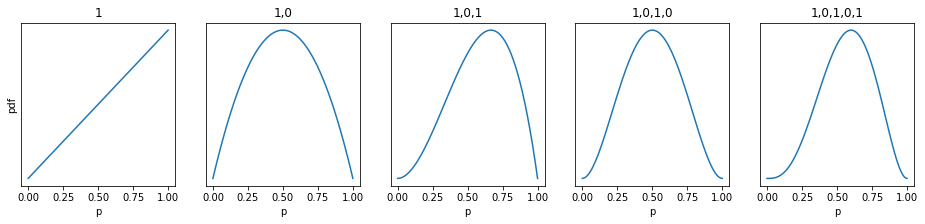

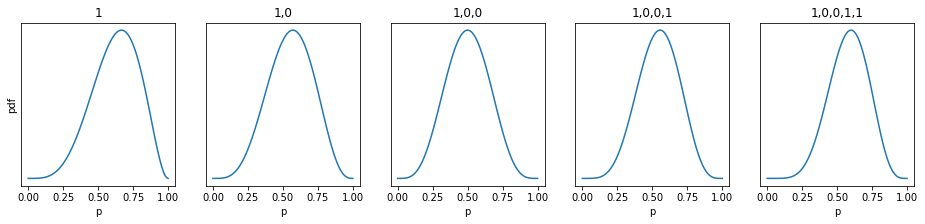

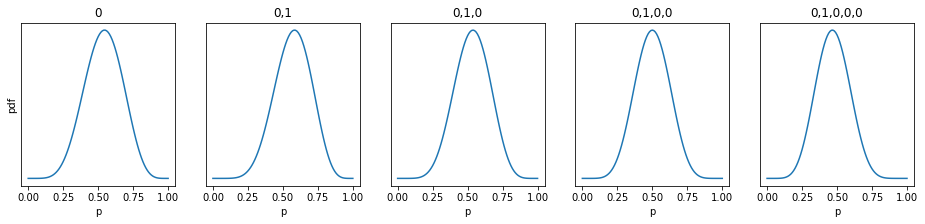

In [15]:
clicks_siteN = [1,0,1,0,1,
                1,0,0,1,1,
                0,1,0,0,0]

bayesN = Bayes(ctr_priors.copy(), ctr_likelihood)

feed_bayes_and_plot(bayesN, clicks_siteN[0:5])
feed_bayes_and_plot(bayesN, clicks_siteN[5:10])
feed_bayes_and_plot(bayesN, clicks_siteN[10:15])

## Bayesian A/B

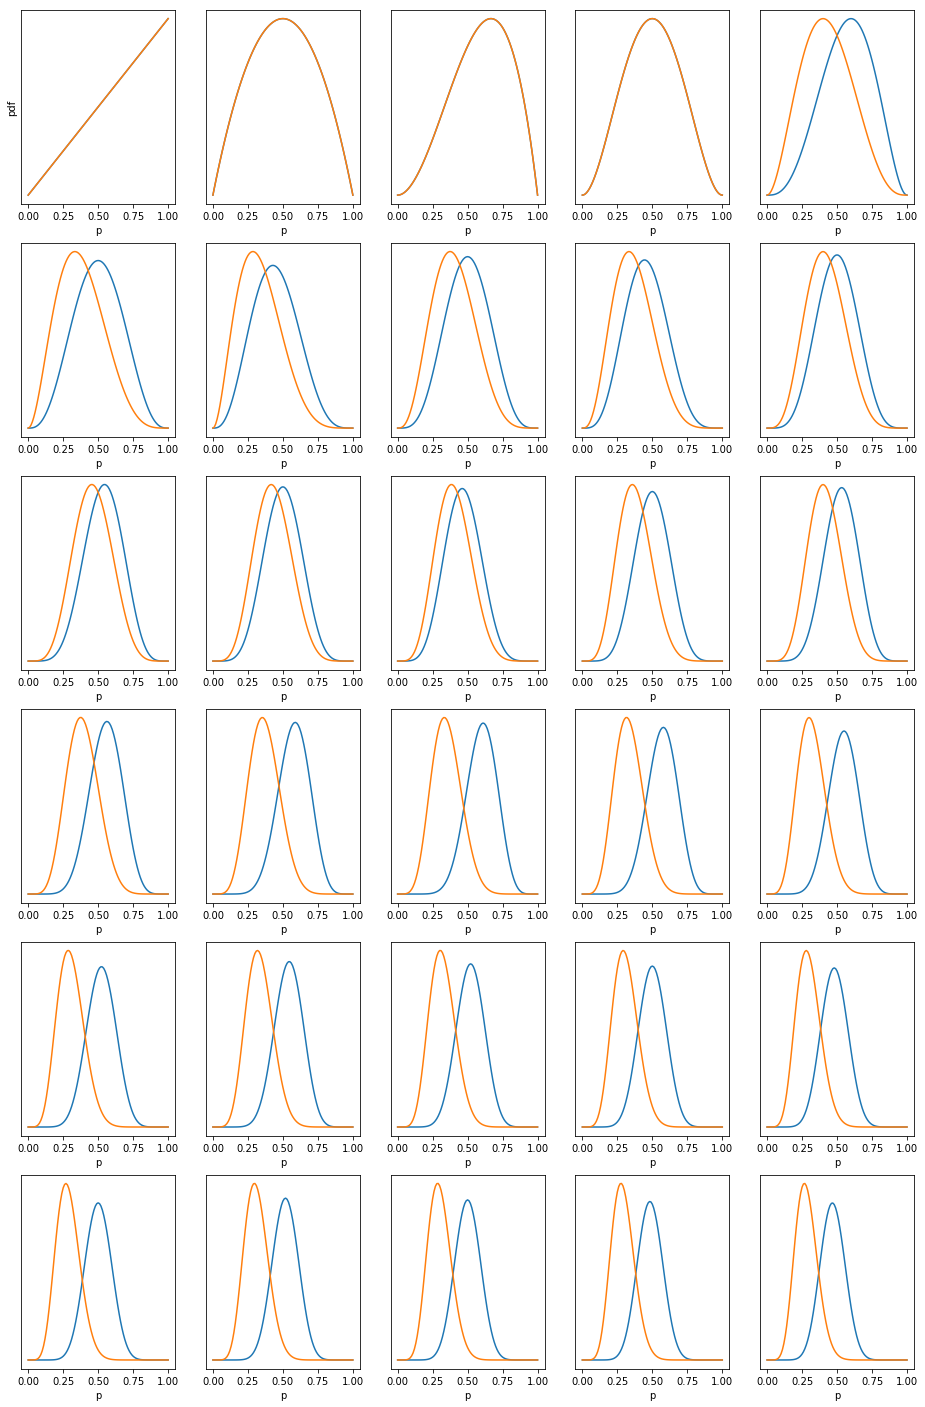

In [16]:
N = 30 # len of both click sequences

clicks_siteA = [1,0,1,0,1,0,0,1,0,1,
                1,0,0,1,1,1,1,1,0,0,
                0,1,0,0,0,1,1,0,0,0]

clicks_siteB = [1,0,1,0,0,0,0,1,0,1,
                1,0,0,0,1,0,0,0,0,0,
                0,1,0,0,0,0,1,0,0,0]

bayesA = Bayes(ctr_priors.copy(), ctr_likelihood)
bayesB = Bayes(ctr_priors.copy(), ctr_likelihood)

fig, axs = plt.subplots(6, 5, figsize=(16, 25))

for i, ax in enumerate(axs.flatten()):
    bayesA.update(clicks_siteA[i])
    bayesB.update(clicks_siteB[i])

    sorted_keys = sorted(ctr_priors.keys())

    sorted_probsA = [bayesA.prior[key] for key in sorted_keys]
    sorted_probsB = [bayesB.prior[key] for key in sorted_keys]

    ax.plot(sorted_keys, sorted_probsA)
    ax.plot(sorted_keys, sorted_probsB)
    ax.get_yaxis().set_ticks([])
    if i==0:
        ax.set_ylabel('pdf')
    ax.set_xlabel('p')


In [17]:
views_A = 100
clicks_A = 58

views_B = 80
clicks_B = 45


In [18]:
# let's draw values from those distribution models
sample_size = 10000

# model for A, fed with the right values
A_sample = stats.beta.rvs(1 + clicks_A,
                          1 + views_A - clicks_A,
                          size=sample_size)

# model for B, fed with the right values
B_sample = stats.beta.rvs(1 + clicks_B,
                          1 + views_B - clicks_B,
                          size=sample_size)

# let's find out likelyhood of A is better than B
print np.mean(A_sample > B_sample)

0.5972
